In [1]:
import torch
import os
from PIL import Image
import clip
import os.path as osp
import os, sys
import torchvision.utils as vutils
sys.path.insert(0, '../')

from lib.utils import load_model_weights,mkdir_p
from models.GALIP import NetG, CLIP_TXT_ENCODER

In [2]:
device = 'cpu' # 'cpu' # 'cuda:0'
CLIP_text = "ViT-B/32"
clip_model, preprocess = clip.load("ViT-B/32", device=device)
clip_model = clip_model.eval()

In [ ]:
text_encoder = CLIP_TXT_ENCODER(clip_model).to(device)
netG = NetG(64, 100, 512, 256, 3, False, clip_model).to(device)
path = '/mnt/datascience3/Boya/bouyang/GALIP/pre_cc12m.pth'
# path = '/mnt/datascience3/Boya/bouyang/GALIP/pre_coco.pth'
path = '/mnt/datascience3/Boya/bouyang/GALIP/code/saved_models/dog/GALIP_nf64_gpu1MP_True_dog_256_2024_11_03_05_40_42/state_epoch_880.pth'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
netG = load_model_weights(netG, checkpoint['model']['netG'], multi_gpus=False)

/tmp/ipykernel_2759771/3272291216.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=torch.device('cpu'))


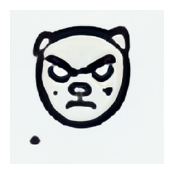

In [19]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt

batch_size = 1
noise = torch.randn((batch_size, 100)).to(device)
captions = ['angry']
with torch.no_grad():
    caption = captions[0]
    tokenized_text = clip.tokenize([caption]).to(device)
    sent_emb, word_emb = text_encoder(tokenized_text)
    sent_emb = sent_emb.repeat(batch_size, 1)
    fake_imgs = netG(noise, sent_emb, eval=True).float()

    # Display images
    for i in range(batch_size):
        img = fake_imgs[i].cpu().detach()  # Move to CPU for display
        img = vutils.make_grid(img, nrow=1, value_range=(-1, 1), normalize=True)
        img = img.permute(1, 2, 0)  # Rearrange dimensions for matplotlib (H, W, C)

        plt.figure(figsize=(2, 2))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


In [4]:
# generate from text
batch_size = 10
noise = torch.randn((batch_size, 100)).to(device)
captions = ['anxious']
captions = ['sad']
with torch.no_grad():
    caption = captions[0]
    tokenized_text = clip.tokenize([caption]).to(device)
    sent_emb, word_emb = text_encoder(tokenized_text)
    sent_emb = sent_emb.repeat(batch_size,1)
    fake_imgs = netG(noise,sent_emb,eval=True).float()
    name = f'{captions[0].replace(" ", "-")}'
    for i in range(10):
        vutils.save_image(fake_imgs[i].data, f'../samples/{name}{i}.png', nrow=1, value_range=(-1, 1), normalize=True)

In [108]:
len(fake_imgs)

1